# ARIMA forecast for the rainfall in Trier Germany

A ARIMA (seasonal/ nonseasonal Auto-Regressive Integrated Moving Average) prediction and forecast of Trier's monthly rainfall. Analogously we can apply the method to the temperature and sunshine duration in the data set. This notebook is a modification of [this repo](https://github.com/gmonaci/ARIMA), which nicely presents the methology for the classic international airline passengers data. Futher theory of ARIMA models can be found there and in its references.

## Importing libraries

In [1]:
import warnings
import os
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('seaborn')

## Loading the data

In [2]:
os.chdir(r'C:\Users\Asus\Documents\01_code\03_projects\weather_trier')

weather = pd.read_excel('data/weather_trier_cleaned.xlsx', index_col=0)
weather.time = pd.to_datetime(weather.time)

# show the latest observations
weather[::-1][:10]

,time,temperature,rain,sunshine
377,2020-06-01,17.3,48.6,223.4
376,2020-05-01,13.5,30.6,308.7
375,2020-04-01,12.5,16.9,301.9
374,2020-03-01,6.7,65.1,165.6
373,2020-02-01,5.9,136.9,63.1
372,2020-01-01,4.2,44.8,44.0
371,2019-12-01,4.6,78.5,55.4
370,2019-11-01,5.2,64.4,34.6
369,2019-10-01,11.4,96.4,90.9
368,2019-09-01,14.8,60.1,186.5


## First impression

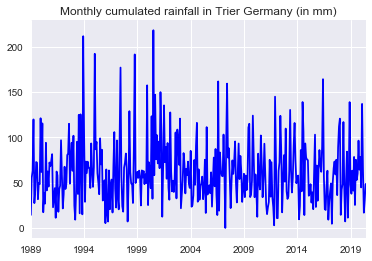

In [3]:
weather.plot('time', 'rain', color ='b')
plt.title('Monthly cumulated rainfall in Trier Germany (in mm)')
plt.legend('')
plt.xlabel('')
plt.show()

## Parameter choice for the ARIMA model

In [4]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

n_models = len(pdq) **2

print('Number of pdq x seasonal_pdq combinations: {}'.format(n_models))
print('\nExamples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Number of pdq x seasonal_pdq combinations: 256

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Splitting in train and test data

In [5]:
old = (weather['time'] < '2019-01-01')
new = (weather['time'] >= '2019-01-01')

train_data = weather.loc[old,'rain']
test_data = weather.loc[new,'rain']

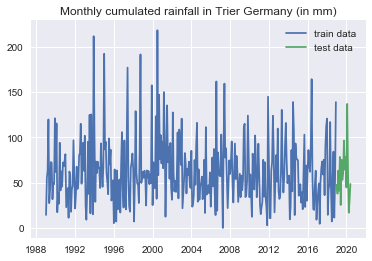

In [6]:
plt.plot(weather.loc[old,'time'],train_data, label ='train data')
plt.plot(weather.loc[new,'time'],test_data, label = 'test data')
plt.title('Monthly cumulated rainfall in Trier Germany (in mm)')
plt.legend()
plt.show()

## Finding the best parameters in the range by the smallest AIC by a grid search

In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []

i = 0 # count the tested models
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                    order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
            results = mod.fit()
            print('{} / {} : SARIMAX{}x{} - AIC:{:.1f}'.format(i + 1,n_models,param, param_seasonal, results.aic))
            i += 1
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

1 / 256 : SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:4091.5
2 / 256 : SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:3816.3
3 / 256 : SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:3705.1
4 / 256 : SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:3383.8
5 / 256 : SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:3673.5
6 / 256 : SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:3507.7
7 / 256 : SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:3515.0
8 / 256 : SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:3385.8
9 / 256 : SARIMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:3499.8
10 / 256 : SARIMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:3401.4
11 / 256 : SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:3362.2
12 / 256 : SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:3280.6
13 / 256 : SARIMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:3356.3
14 / 256 : SARIMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:3283.0
15 / 256 : SARIMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:3217.4
16 / 256 : SARIMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:3161.8
17 / 256 : SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:3930.9
18 / 256 : SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:3733.1
19 / 256 : SARIMAX(

150 / 256 : SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:3493.9
151 / 256 : SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:3498.9
152 / 256 : SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:3379.5
153 / 256 : SARIMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:3377.2
154 / 256 : SARIMAX(2, 0, 1)x(2, 0, 1, 12) - AIC:3378.7
155 / 256 : SARIMAX(2, 0, 1)x(2, 1, 0, 12) - AIC:3346.6
156 / 256 : SARIMAX(2, 0, 1)x(2, 1, 1, 12) - AIC:3264.1
157 / 256 : SARIMAX(2, 0, 1)x(3, 0, 0, 12) - AIC:3259.2
158 / 256 : SARIMAX(2, 0, 1)x(3, 0, 1, 12) - AIC:3262.2
159 / 256 : SARIMAX(2, 0, 1)x(3, 1, 0, 12) - AIC:3200.5
160 / 256 : SARIMAX(2, 0, 1)x(3, 1, 1, 12) - AIC:3145.9
161 / 256 : SARIMAX(2, 1, 0)x(0, 0, 0, 12) - AIC:3687.9
162 / 256 : SARIMAX(2, 1, 0)x(0, 0, 1, 12) - AIC:3576.4
163 / 256 : SARIMAX(2, 1, 0)x(0, 1, 0, 12) - AIC:3787.5
164 / 256 : SARIMAX(2, 1, 0)x(0, 1, 1, 12) - AIC:3473.2
165 / 256 : SARIMAX(2, 1, 0)x(1, 0, 0, 12) - AIC:3562.9
166 / 256 : SARIMAX(2, 1, 0)x(1, 0, 1, 12) - AIC:3564.7
167 / 256 : SARIMAX(2, 1, 0)x(1, 1, 0, 12) - AIC

## With the following a specified model can be tested

In [8]:
# used parameter
param = (3, 1 , 1)
seasonal_param = (3, 1, 1, 12)

mod = sm.tsa.statespace.SARIMAX(train_data,
                                order = param,
                                seasonal_order = seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.aic

3130.678306726245

## Find the model with the smallest AIC and fit it

In [18]:
print('The smallest AIC is {:.1f} for the model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 3130.7 for the model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


In [19]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

## Showing diagnostics

The models assumptions seem to be satisfied.

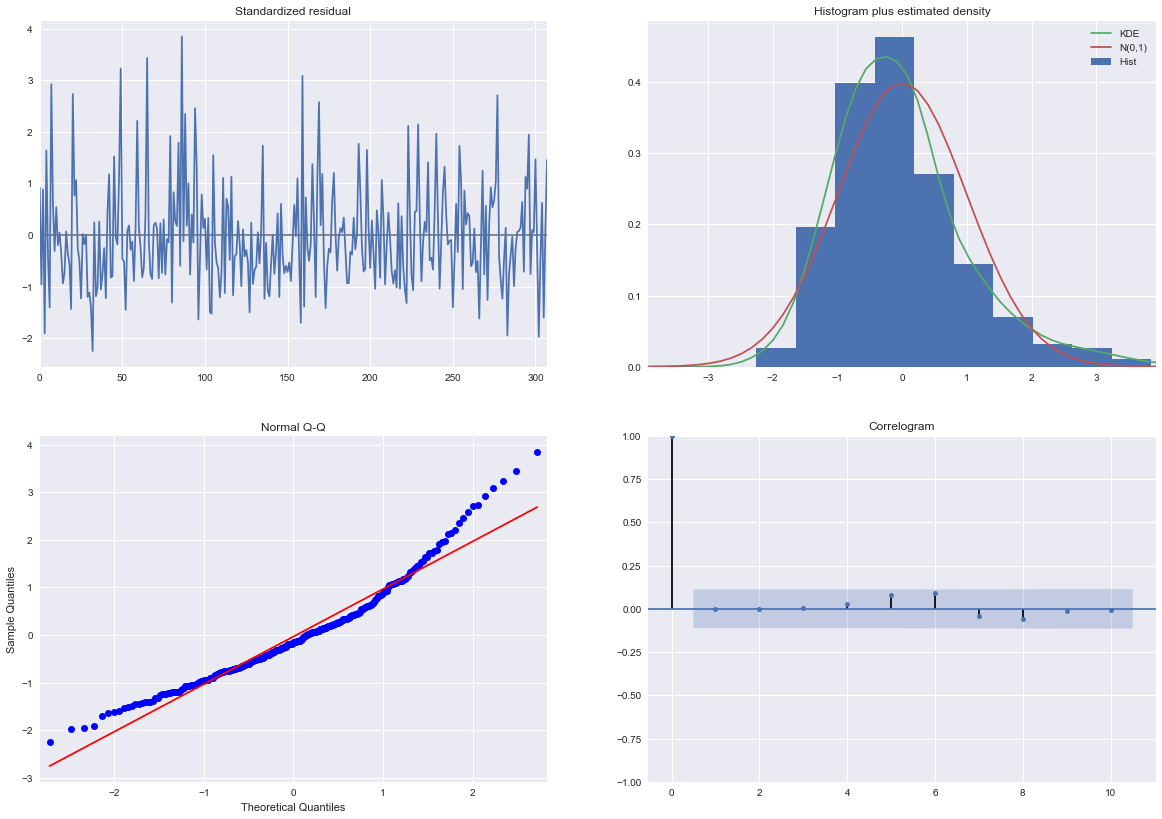

In [10]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

## Different ways of prediction / forecasting

In [11]:
pred0 = results.get_prediction(348, 377, dynamic=False)
pred0_ci = pred0.conf_int()

In [12]:
pred1 = results.get_prediction(348, 377, dynamic=True)
pred1_ci = pred1.conf_int()

In [13]:
pred2 = results.get_forecast(21)
pred2_ci = pred2.conf_int()

## Plotting the results

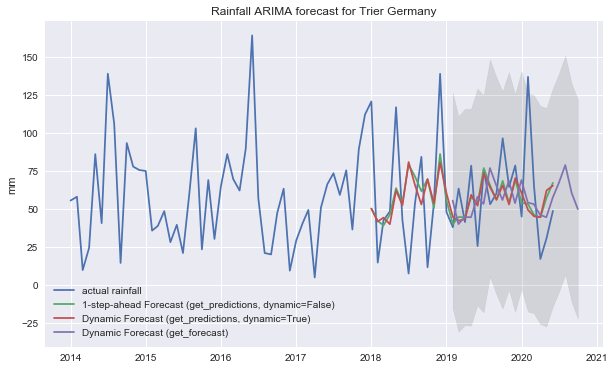

In [14]:
fig, ax = plt.subplots(figsize = (10,6))

future_ran = pd.date_range(weather.time.iloc[360], periods = 21, freq ='m')
plt.plot(weather.time[300:], weather.rain[300:], label ='actual rainfall')
plt.plot(weather.time[348:], pred0.predicted_mean, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
plt.plot(weather.time[348:], pred1.predicted_mean, label='Dynamic Forecast (get_predictions, dynamic=True)')
plt.plot(future_ran, pred2.predicted_mean, label='Dynamic Forecast (get_forecast)')
plt.title('Rainfall ARIMA forecast for Trier Germany')
ax.fill_between(future_ran, np.array(pred2_ci.iloc[:, 0]), np.array(pred2_ci.iloc[:, 1]), color='k', alpha=.1)
plt.legend()
plt.ylabel('mm')
plt.show()

## Which prediction fits the data from 2019 better?

In [23]:
rain_true19 = weather.rain
pred0_19 = pred0.predicted_mean
pred1_19 = pred1.predicted_mean
pred2_19 = pred2.predicted_mean

MAPE0 = np.mean([np.abs(rain_true19[i] - pred0_19[i]) / rain_true19[i] for i in range(360,372)])
MAPE1 = np.mean([np.abs(rain_true19[i] - pred1_19[i]) / rain_true19[i] for i in range(360,372)])
MAPE2 = np.mean([np.abs(rain_true19[i] - pred2_19[i]) / rain_true19[i] for i in range(360,372)])

mse0 = np.mean([(rain_true19[i] - pred0_19[i]) ** 2 for i in range(360,372)])
mse1 = np.mean([(rain_true19[i] - pred1_19[i]) ** 2 for i in range(360,372)])
mse2 = np.mean([(rain_true19[i] - pred2_19[i]) ** 2 for i in range(360,372)])


print('------------------------------------------')
print('---------- Comparison for 2019 -----------')
print('------------------------------------------')
print('measure  |   MAPE    |   squareroot of mse')
print('------------------------------------------')
print('pred0    |   {:.1f}%   |   {:.1f}'.format(MAPE0 * 100, np.sqrt(mse0)))
print('pred1    |   {:.1f}%   |   {:.1f}'.format(MAPE1 * 100, np.sqrt(mse1)))
print('pred2    |   {:.1f}%   |   {:.1f}'.format(MAPE2 * 100, np.sqrt(mse2)))



------------------------------------------
---------- Comparison for 2019 -----------
------------------------------------------
measure  |   MAPE    |   squareroot of mse
------------------------------------------
pred0    |   23.7%   |   15.2
pred1    |   25.2%   |   15.9
pred2    |   23.7%   |   15.2


Thus we take e.g. the last forecast and get the following result:

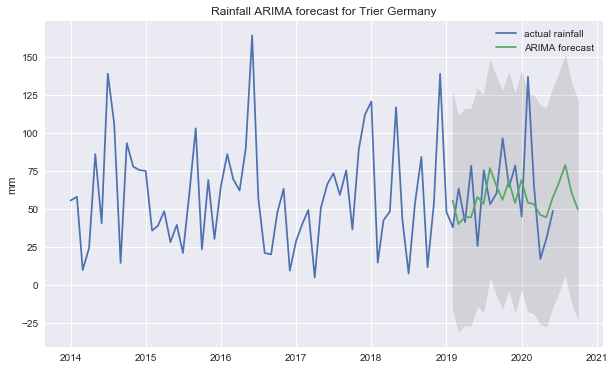

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

future_ran = pd.date_range(weather.time.iloc[360], periods = 21, freq ='m')
plt.plot(weather.time[300:], weather.rain[300:], label ='actual rainfall')
plt.plot(future_ran, pred2.predicted_mean, label='ARIMA forecast')
plt.title('Rainfall ARIMA forecast for Trier Germany')
ax.fill_between(future_ran, np.array(pred2_ci.iloc[:, 0]), np.array(pred2_ci.iloc[:, 1]), color='k', alpha=.1)
plt.legend()
plt.ylabel('mm')
plt.show()

The model does not fit our data very well and the forecast of the LSTM model we calculated seems to be much better and should be used for the rainfall data.